In [1]:
def Print_values(a, b, c):
    if a > b:
        if b > c:
            result = a + b - 10 * c
        elif a > c:
            result = a + c - 10 * b
        else:
            result = c + a - 10 * b
    else:
        if b > c:
            # 这个判断下无对话框，故规定生成blank
            result = "Blank"
        else:
            result = c + b - 10 * a
    print("结果是：", result)

# 输入abc值
a = int(input("a="))
b = int(input("b="))
c = int(input("c="))
# 调用函数
Print_values(a, b, c)

a= 5
b= 15
c= 10


结果是： Blank


In [2]:
#引入函数
import math
import random

#定义递归函数
def F(x):
    #当x=1时，F(1)=1
    if x==1:
        return 1
    return F(math.ceil(x/3))+2*x

#随机N个数来测试(查阅资料得知,sample函数是生成不重复的随机数)
N = 10  # 需要定义N的值
num_list=random.sample(range(1,101),N)

#可以测试10个来验证
for x in num_list:
    print(f"F({x}) = {F(x)}")

F(53) = 159
F(78) = 233
F(36) = 109
F(15) = 45
F(28) = 89
F(55) = 169
F(24) = 71
F(45) = 135
F(59) = 179
F(47) = 143


In [3]:
#3.1先定义一个函数，再计算10骰子朝上面的总和
def Find_number_of_ways(x):
    
    #当x小于骰子朝上面总和的最小值和大于最大值的时候返回0
    if x<10 or x>60:
        return 0
   
    #查询AI得到动态规划的方法
    #表示投掷了若干个骰子后，总和为i的方法
    #定义一个ways来记录投掷骰子的方法
    ways=[0]*61  #创建一个包含60个0的列表
    ways[0]=1    #最开始：0个骰子，总和为0，（）有1种方法什么也不做）
    
    #开始投掷10个骰子
    for dice in range(10):
        new_ways=[0]*61 
        for i in range(61):
            if ways[i] > 0:
                #新骰子点数1~6
                for face in range(1,7):
                    if i+face <= 60:
                        new_ways[i+face] += ways[i]
        ways=new_ways #更新动态
    return ways[x]

#3.2计算并找到最大值
import numpy as np

Number_of_ways=[]
for x in range(10,61):
    Number_of_ways.append(Find_number_of_ways(x))

#找最大值
arr=np.array(Number_of_ways)
max_x=arr.max()
best_x = Number_of_ways.index(max_x) + 10  #值最小是10，从10开始

print(f"最大的 x 是: {best_x}")
print(f"对应的方法数为: {max_x}")

最大的 x 是: 35
对应的方法数为: 4395456


开始计算...
数组内容: [8] 总和: 8.00
数组内容: [1, 2] 总和: 4.50
数组内容: [1, 3, 7] 总和: 25.67
数组内容: [3, 3, 9, 9] 总和: 90.00
数组内容: [0, 8, 9, 5, 10] 总和: 198.40

最终结果汇总:
数组大小: 1, 平均值之和: 8.00
数组大小: 2, 平均值之和: 4.50
数组大小: 3, 平均值之和: 25.67
数组大小: 4, 平均值之和: 90.00
数组大小: 5, 平均值之和: 198.40


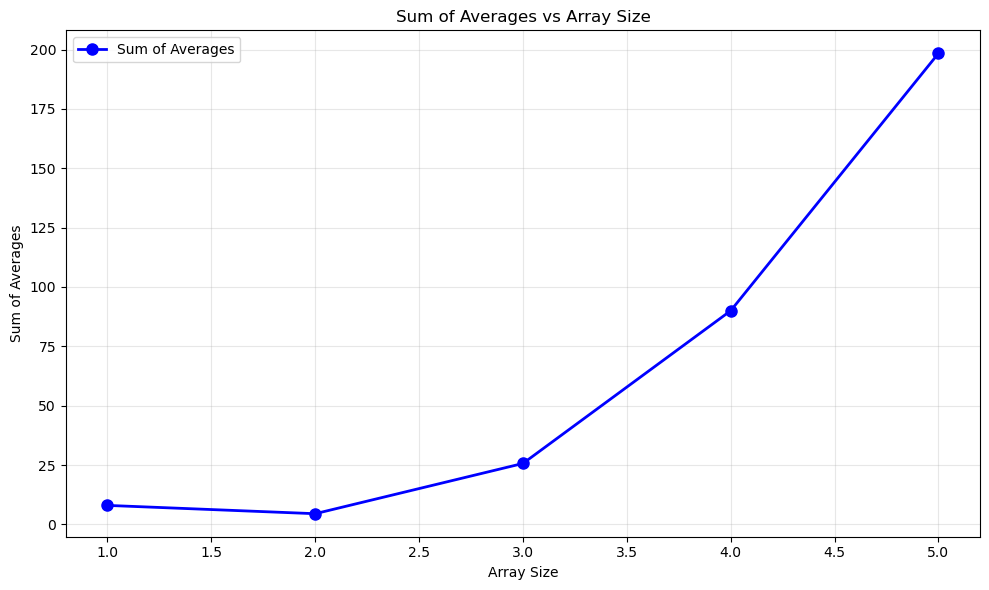

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# 4.1 生成随机数组，并返回n个随机整数的列表
def Random_integer(N):
    return [random.randint(0, 10) for _ in range(N)]

# 4.2 计算非空子集的平均值
def Sum_averages(arr):
    arr1 = np.array(arr)

    # 生成所有子集
    def get_subsets(i, current, subsets):
        if i == arr1.size:
            subsets.append(current.copy())
            return
        get_subsets(i + 1, current, subsets)
        get_subsets(i + 1, np.append(current, arr1[i]), subsets)
    
    all_subsets = []
    get_subsets(0, np.array([]), all_subsets)

    # 计算非空子集平均值之和
    total_sum = 0
    for subset in all_subsets:
        if subset.size > 0:
            subset_sum = np.sum(subset)
            subset_avg = subset_sum / subset.size
            total_sum += subset_avg
    
    # 只打印数组内容和总和
    print(f"数组内容: {arr} 总和: {total_sum:.2f}")
    return total_sum

# 4.3 定义数列
Total_sum_averages = []

print("开始计算...")
# 计算5个不同大小的数组
for j in range(1, 6):  # j 从 1 到 5
    arr2 = Random_integer(j)
    result = Sum_averages(arr2)
    Total_sum_averages.append(result)

print(f"\n最终结果汇总:")
for i in range(5):
    print(f"数组大小: {i+1}, 平均值之和: {Total_sum_averages[i]:.2f}")

# 绘制图（5个点）
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), Total_sum_averages, 'bo-', linewidth=2, markersize=8, label='Sum of Averages')
plt.title('Sum of Averages vs Array Size')
plt.xlabel('Array Size')
plt.ylabel('Sum of Averages')
plt.grid(True, alpha=0.3)

plt.legend()
plt.tight_layout()
plt.show()


In [4]:
import numpy as np

# 5.1 生成 m×m 矩阵
def create_square_matrix(m: int, p_one: float = 0.5) -> np.ndarray:
    # 生成 [0,1) 随机数，然后阈值化为 0/1
    rand = np.random.rand(m, m)
    mat = (rand < p_one).astype(np.int64)
    # 固定左上和右下为 1
    if m > 0:
        mat[0, 0] = 1
        mat[m-1, m-1] = 1
    return mat

# 额外：生成任意 rows×cols 的矩阵（用于 5.3）
def create_rect_matrix(rows: int, cols: int, p_one: float = 0.5) -> np.ndarray:
    rand = np.random.rand(rows, cols)
    mat = (rand < p_one).astype(np.int64)
    if rows > 0 and cols > 0:
        mat[0, 0] = 1
        mat[rows-1, cols-1] = 1
    return mat

# 5.2 不用 DP，递归 DFS 计数
def Count_path_DFS(mat: np.ndarray) -> int:
    n, m = mat.shape[0], mat.shape[1]

    # 如果起点或终点是障碍，直接 0
    if mat[0, 0] == 0 or mat[n-1, m-1] == 0:
        return 0

    # 递归函数：返回从 (i,j) 到终点的路径条数
    def dfs(i: int, j: int) -> int:
        # 越界：无路
        if i < 0 or i >= n or j < 0 or j >= m:
            return 0
        # 障碍：无路
        if mat[i, j] == 0:
            return 0
        # 到终点：找到一条路
        if i == n - 1 and j == m - 1:
            return 1
        # 否则，向“下”和“右”继续探索（只允许这两个方向）
        down_paths = dfs(i + 1, j)
        right_paths = dfs(i, j + 1)
        return down_paths + right_paths

    return dfs(0, 0)

# ----------------
# 小示例（5.1+5.2）
# ----------------
np.random.seed(7)  # 固定随机种子，便于复现
m = 5
demo = create_square_matrix(m, p_one=0.5)
print("示例矩阵 (m=5):\n", demo)
print("示例路径数（DFS）=", Count_path_DFS(demo))

# --------------
# 5.3 重复试验
# --------------
rows, cols = 10, 8
runs = 1000
p_one = 0.5
total_paths = 0

for _ in range(runs):
    mat = create_rect_matrix(rows, cols, p_one=p_one)
    total_paths += Count_path_DFS(mat)

mean_paths = total_paths / runs
print("\n5.3 平均路径数 (rows=10, cols=8, runs=1000, DFS) =", mean_paths)

示例矩阵 (m=5):
 [[1 0 1 0 0]
 [0 0 1 1 1]
 [0 0 1 1 1]
 [0 1 1 0 1]
 [0 0 1 0 1]]
示例路径数（DFS）= 0

5.3 平均路径数 (rows=10, cols=8, runs=1000, DFS) = 0.387
